In [1]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice

Connecting hanhou@datajoint.mesoscale-activity-map.org:3306


# Query examples

Overview of all 2-lickport foraging sessions<br>
`session_task_protocol = 100` two-lickport foraging task<br>
`session_real_foraging` excludes very early training sessions where reward probabilities are [0, 1]

In [ ]:
h2o = lab.WaterRestriction.proj('water_restriction_number')   # Water restriction number
foraging_sessions = (foraging_analysis.SessionTaskProtocol() * h2o                      
                     & 'session_task_protocol = 100' & 'session_real_foraging')
foraging_sessions

How many sessions for each mouse

In [ ]:
(h2o.aggr(foraging_sessions.proj(), num_sessions='count(*)') * h2o).fetch(format='frame', order_by='water_restriction_number')

Plot summary of an example session

In [2]:
sess_key={'subject_id': 482350, 'session': 52}

In [ ]:
from pipeline.plot.foraging_plot import plot_foragingWebGUI_session
plot_foragingWebGUI_session(wr_name_selected=(h2o & sess_key).fetch1('water_restriction_number'), session_selected=sess_key['session'])

# Model fitting results

## All models

In [9]:
foraging_model.Model()

model_id,"model_class e.g. LossCounting, RW1972, Hattori2019",model_notation,n_params Effective param count,is_bias,is_epsilon_greedy,is_softmax,is_choice_kernel,desc Long name,fit_cmd Fitting command compatible with the Dynamic-Foraing repo
0,LossCounting,"LossCounting ($\mu_{LC}$, $\sigma_{LC}$)",2,0,0,0,0,"LossCounting: mean, std, no bias",=BLOB=
1,RW1972,"RW1972_epsi ($\alpha$, $\epsilon$)",2,0,1,0,0,"SuttonBarto: epsilon, no bias",=BLOB=
2,RW1972,"RW1972_softmax ($\alpha$, $\sigma$)",2,0,0,1,0,"SuttonBarto: softmax, no bias",=BLOB=
3,LNP,"LNP_softmax ($\tau_1$, $\sigma$)",2,0,0,1,0,"Sugrue2004, Corrado2005: one tau, no bias",=BLOB=
4,LNP,"LNP_softmax ($\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$)",4,0,0,1,0,"Corrado2005, Iigaya2019: two taus, no bias",=BLOB=
5,Bari2019,"Bari2019 ($\alpha$, $\delta$, $\sigma$)",3,0,0,1,0,"RL: chosen, unchosen, softmax, no bias",=BLOB=
6,Hattori2019,"Hattori2019 ($\alpha_{rew}$, $\alpha_{unr}$, $\sigma$)",3,0,0,1,0,"RL: rew, unrew, softmax, no bias",=BLOB=
7,Hattori2019,"Hattori2019 ($\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$)",4,0,0,1,0,"RL: rew, unrew, unchosen, softmax, no bias",=BLOB=
8,RW1972,"RW1972_epsi ($\alpha$, $\epsilon$, $b_L$)",3,1,1,0,0,SuttonBarto: epsilon,=BLOB=
9,RW1972,"RW1972_softmax ($\alpha$, $\sigma$, $b_L$)",3,1,0,1,0,SuttonBarto: softmax,=BLOB=


## All model comparison groups

In [30]:
foraging_model.ModelComparison()

model_comparison_idx,desc
0,all_models
1,models_with_bias
2,models_with_bias_and_choice_kernel


## Example session

`model_comparison_idx` = 1: all models with bias term<br>
`sort='aic'`: sorted by AIC, from best to worst

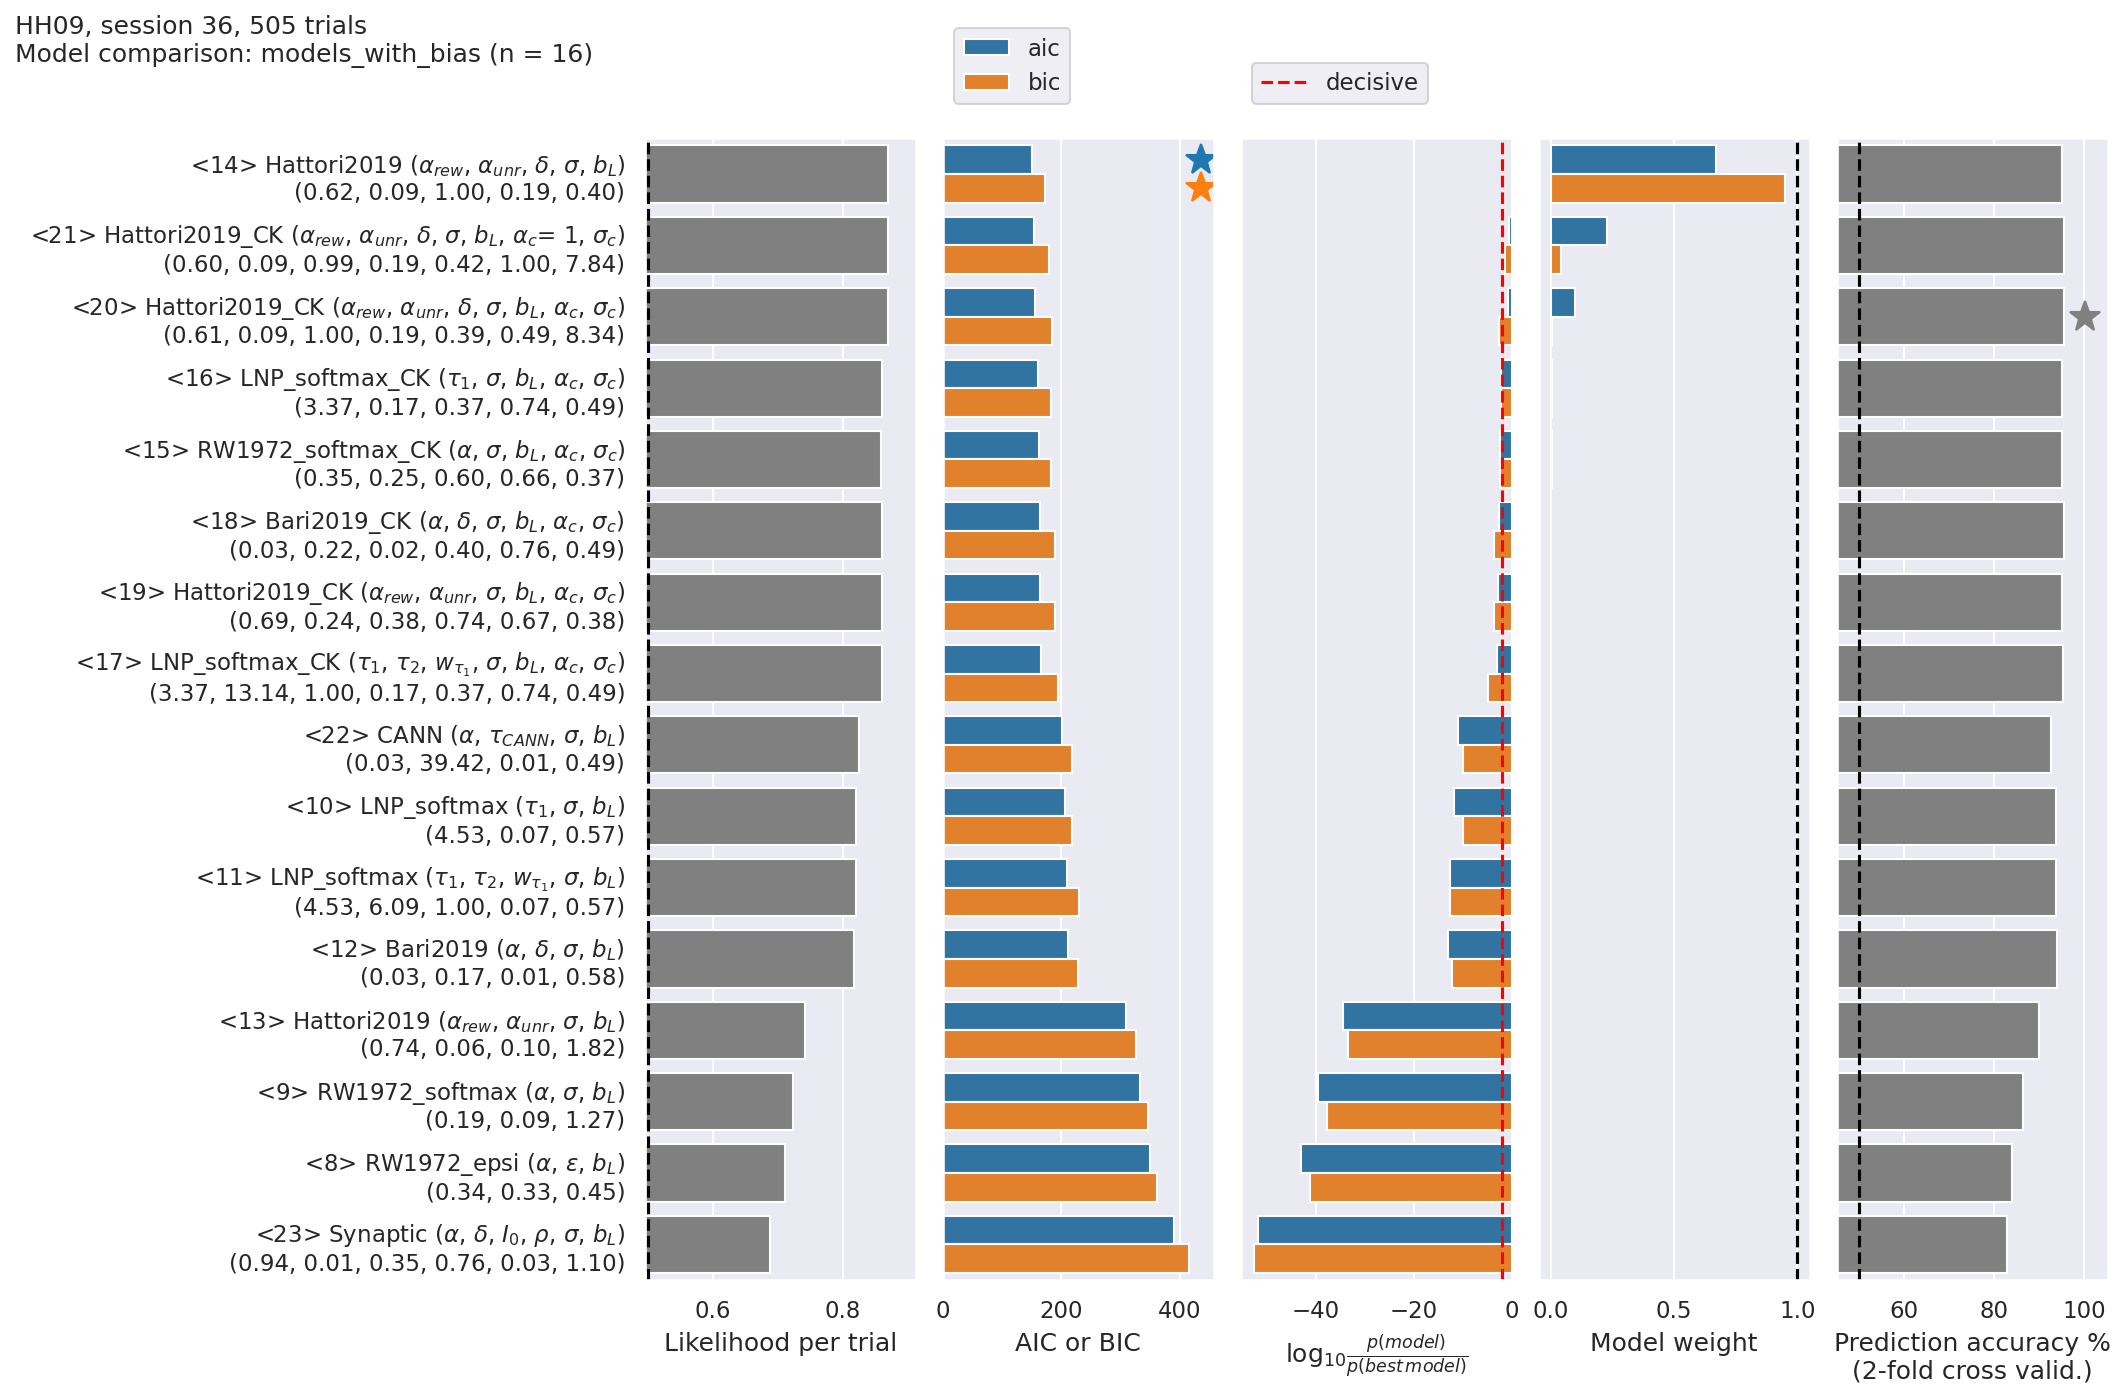

In [11]:
sess_key = {'subject_id': 473361, 'session': 36}
plot_session_model_comparison(sess_key, model_comparison_idx=1, sort='aic')

Raw fitted results

In [12]:
foraging_model.Model.proj('model_notation') * (foraging_model.FittedSessionModel & sess_key) 

model_id,subject_id institution 6 digit animal ID,session session number,model_notation,n_trials,n_params,log_likelihood raw log likelihood of the model,aic AIC,bic BIC,lpt Likelihood-Per-Trial raw,lpt_aic Likelihood-Per-Trial with AIC penalty,lpt_bic Likelihood-Per-Trial with AIC penalty,prediction_accuracy non-cross-validated prediction accuracy,cross_valid_accuracy_fit cross-validated accuracy (fitting set),cross_valid_accuracy_test cross-validated accuracy (testing set),cross_valid_accuracy_test_bias_only accuracy predicted only by bias (testing set)
8,473361,36,"RW1972_epsi ($\alpha$, $\epsilon$, $b_L$)",505,3,-171.802,349.605,362.279,0.711626,0.707411,0.69859,0.845545,0.849442,0.839552,0.641571
9,473361,36,"RW1972_softmax ($\alpha$, $\sigma$, $b_L$)",505,3,-163.608,333.215,345.889,0.723268,0.718984,0.710019,0.865347,0.863393,0.863393,0.641579
10,473361,36,"LNP_softmax ($\tau_1$, $\sigma$, $b_L$)",505,3,-99.8711,205.742,218.416,0.820563,0.815703,0.805531,0.940594,0.938633,0.938633,0.641571
11,473361,36,"LNP_softmax ($\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$)",505,5,-99.8711,209.742,230.865,0.820563,0.812479,0.795663,0.940594,0.93861,0.93861,0.641563
12,473361,36,"Bari2019 ($\alpha$, $\delta$, $\sigma$, $b_L$)",505,4,-101.758,211.517,228.415,0.817502,0.811052,0.797596,0.940594,0.940578,0.940578,0.641618
13,473361,36,"Hattori2019 ($\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$)",505,4,-150.848,309.695,326.593,0.741776,0.735924,0.723713,0.89703,0.90495,0.898998,0.641587
14,473361,36,"Hattori2019 ($\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$)",505,5,-70.6121,151.224,172.347,0.86951,0.860943,0.843125,0.958416,0.958427,0.950522,0.481468
15,473361,36,"RW1972_softmax_CK ($\alpha$, $\sigma$, $b_L$, $\alpha_c$, $\sigma_c$)",505,5,-76.1768,162.354,183.476,0.859981,0.851508,0.833885,0.950495,0.958404,0.950491,0.641595
16,473361,36,"LNP_softmax_CK ($\tau_1$, $\sigma$, $b_L$, $\alpha_c$, $\sigma_c$)",505,5,-75.7256,161.451,182.574,0.86075,0.852269,0.83463,0.954455,0.954428,0.950483,0.64154
17,473361,36,"LNP_softmax_CK ($\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$, $\alpha_c$, $\sigma_c$)",505,7,-75.7256,165.451,195.023,0.86075,0.848901,0.824406,0.954455,0.954459,0.952475,0.641673


Plot fitted choice traces of best and worst models

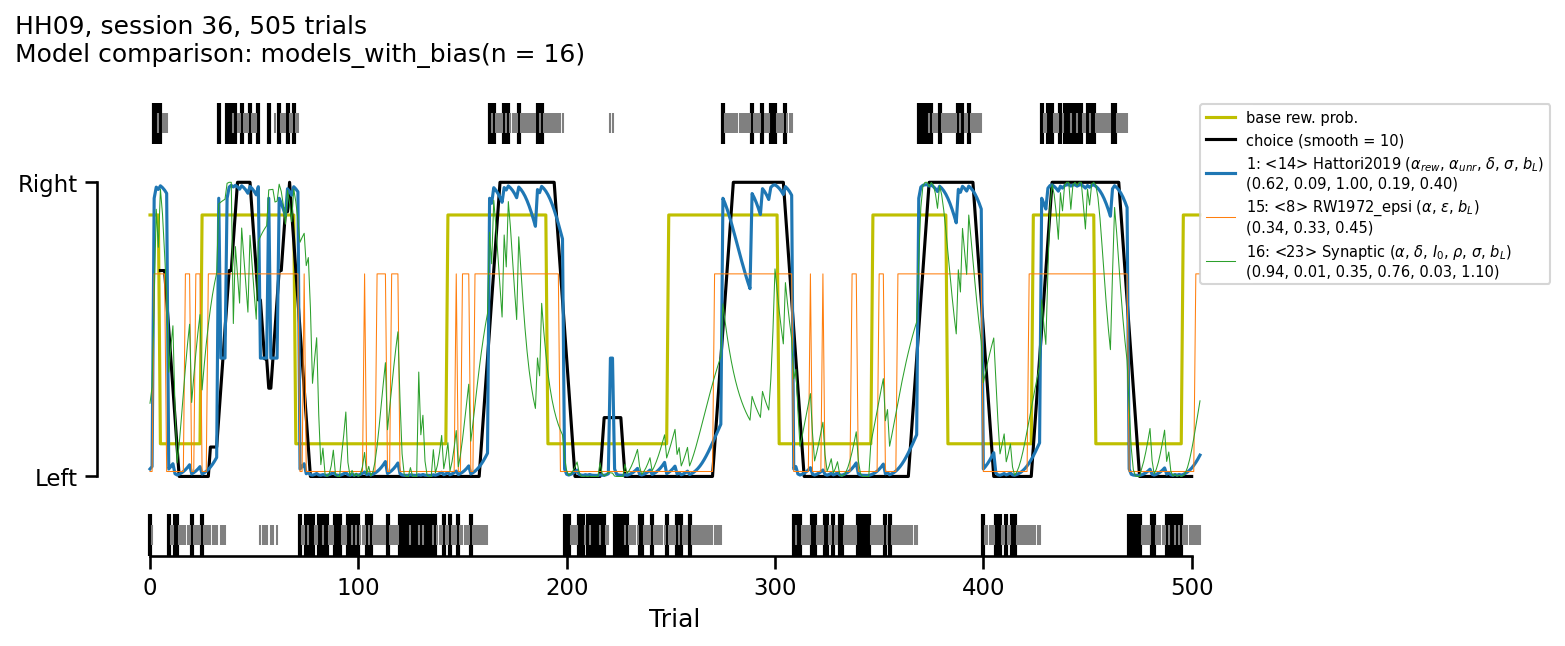

In [25]:
plot_session_fitted_choice(sess_key=sess_key, first_n=1, last_n=2, smooth_factor=10, model_comparison_idx=1)

Plot specified models

CANN model (22), Synaptic (23), and Hattori (14)

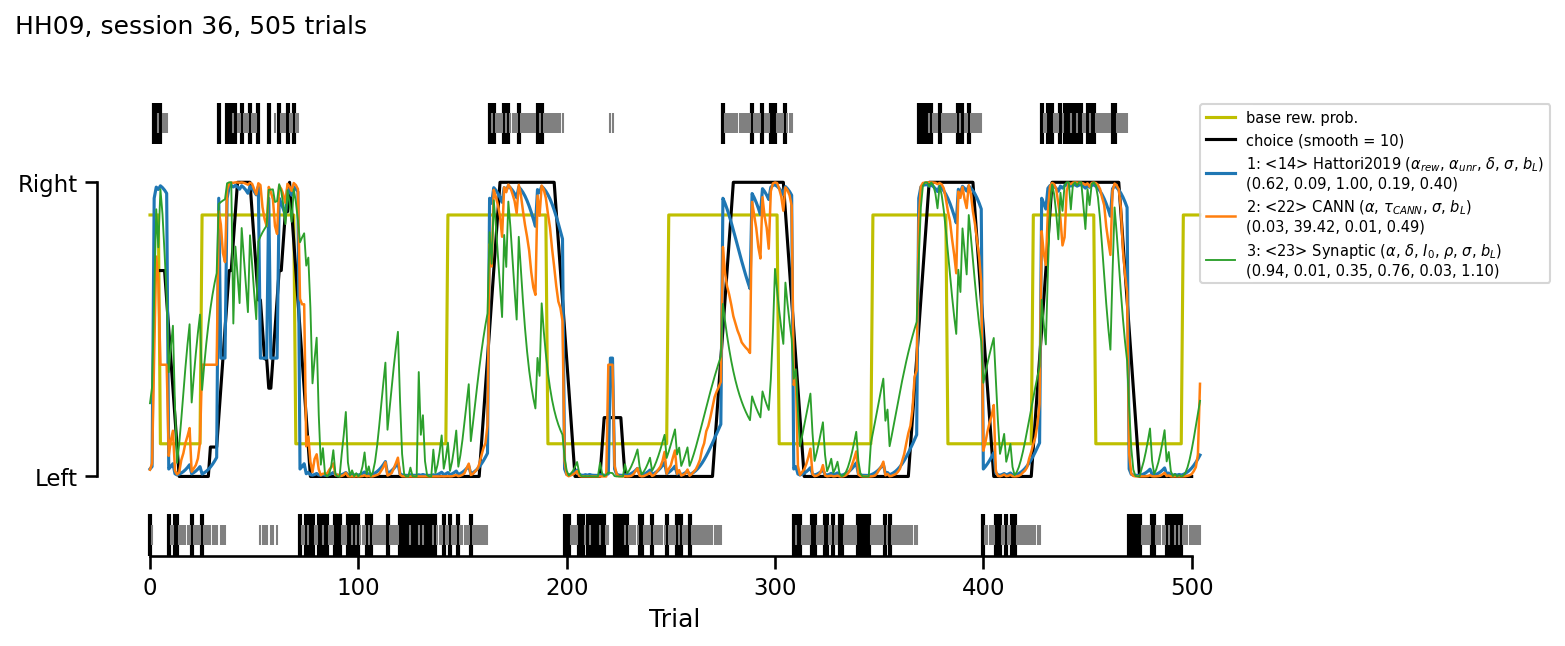

In [45]:
plot_session_fitted_choice(sess_key=sess_key, specified_model_ids=[22, 23, 14], smooth_factor=10)

## Distributions of fitted params

$\tau_{CANN}$ of line attractor model

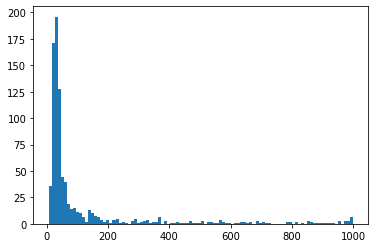

In [50]:
model_id = 22
param = 'tau_cann'
q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
_ = plt.hist(q, 100)

$I_0$ of synaptic model

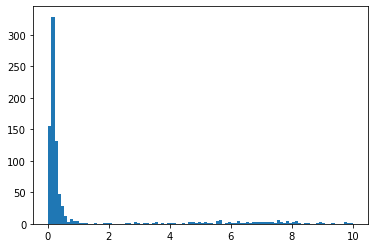

In [51]:
model_id = 23
param = 'I0'
q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
_ = plt.hist(q, 100)

## Problems in Synaptic model?

### Some fitted $\rho$s are at the boundary 0 and 1

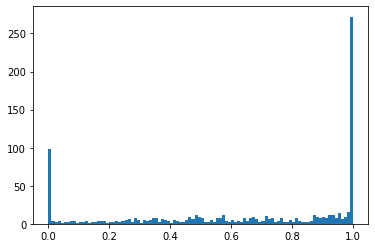

In [125]:
model_id = 23
param = 'rho'
q = (foraging_model.FittedSessionModel.Param & {'model_id': model_id, 'model_param': param}).fetch('fitted_value')
_ = plt.hist(q, 100)

But the fitting seems fine

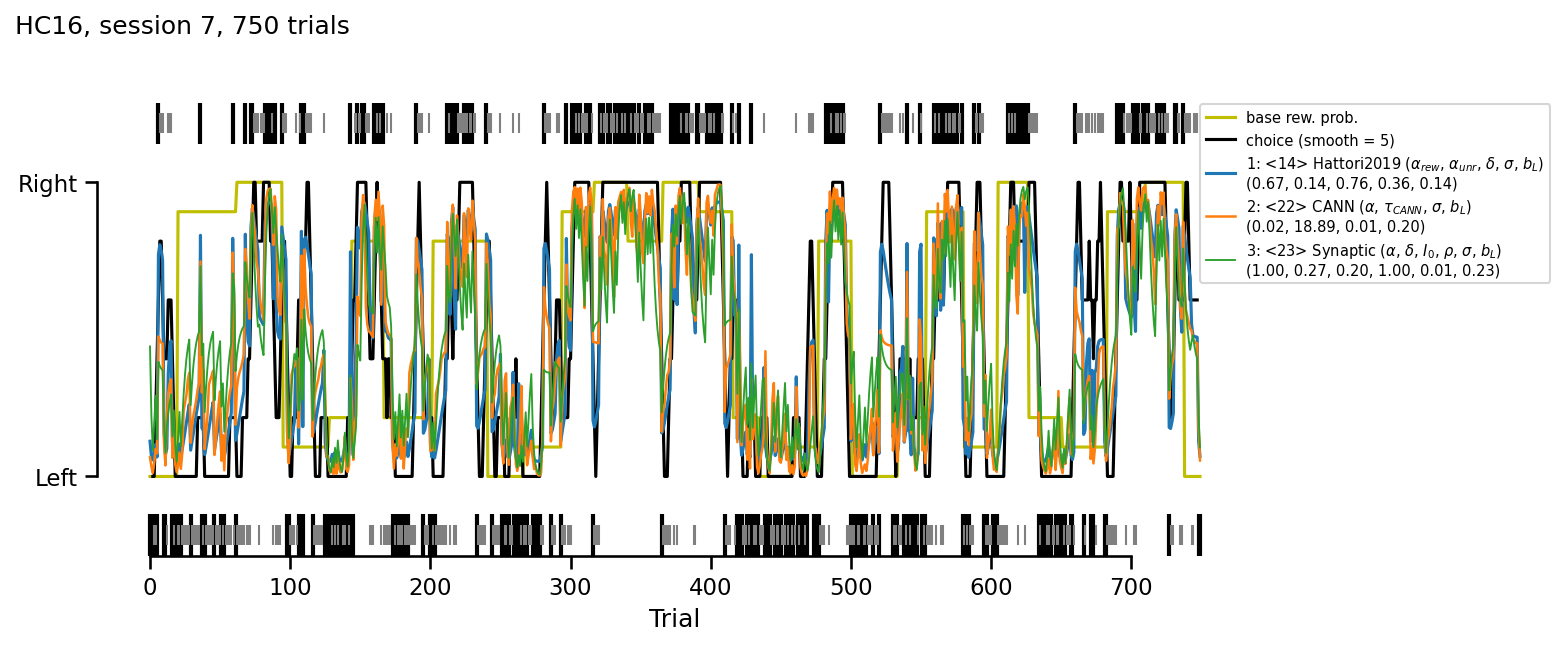

In [143]:
key = (experiment.Session & (foraging_model.FittedSessionModel.Param & 'model_param = "rho"' & 'fitted_value = 1')).fetch(limit=1, offset=1)[0]
plot_session_fitted_choice(key, specified_model_ids=[14, 22, 23])

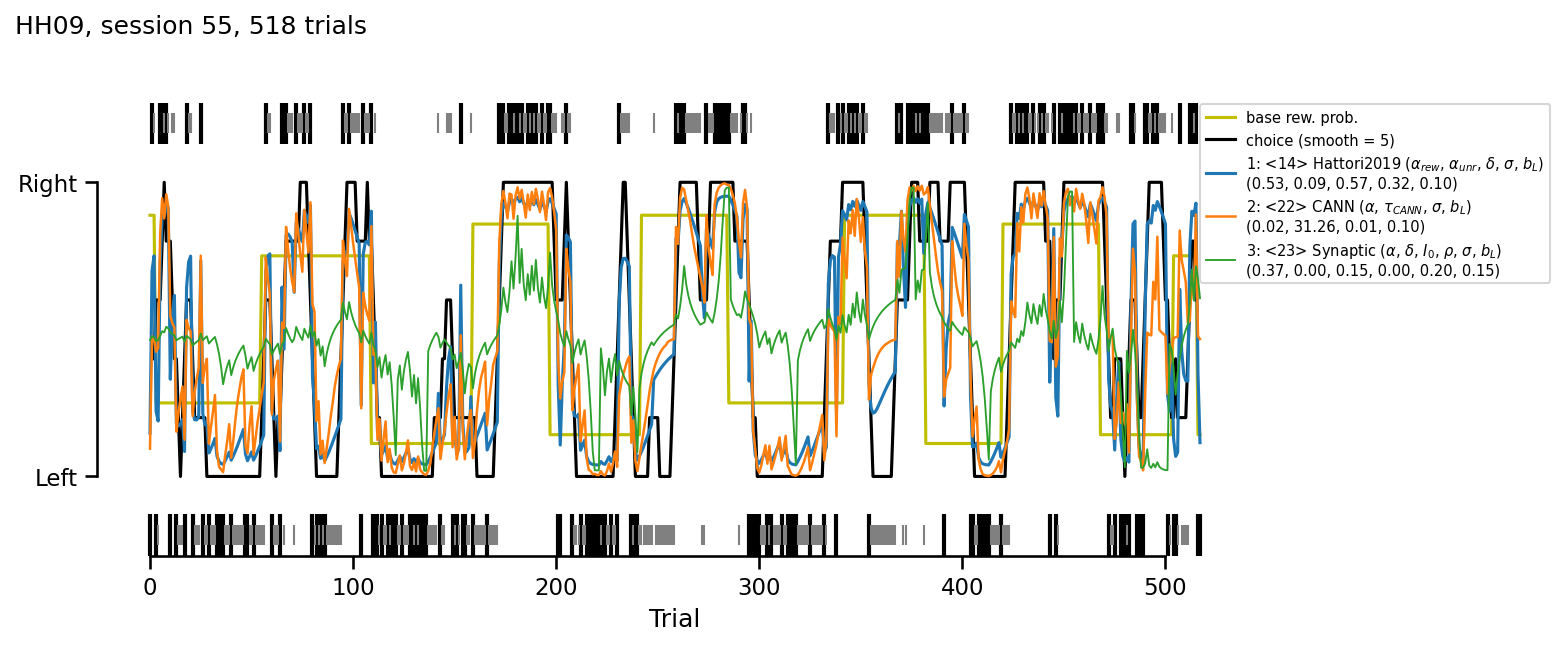

In [148]:
key = (experiment.Session & (foraging_model.FittedSessionModel.Param & 'model_param = "rho"' & 'fitted_value = 0')).fetch(limit=1, offset=80)[0]
plot_session_fitted_choice(key, specified_model_ids=[14, 22, 23])

### `Synaptic model` fails

Some random examples

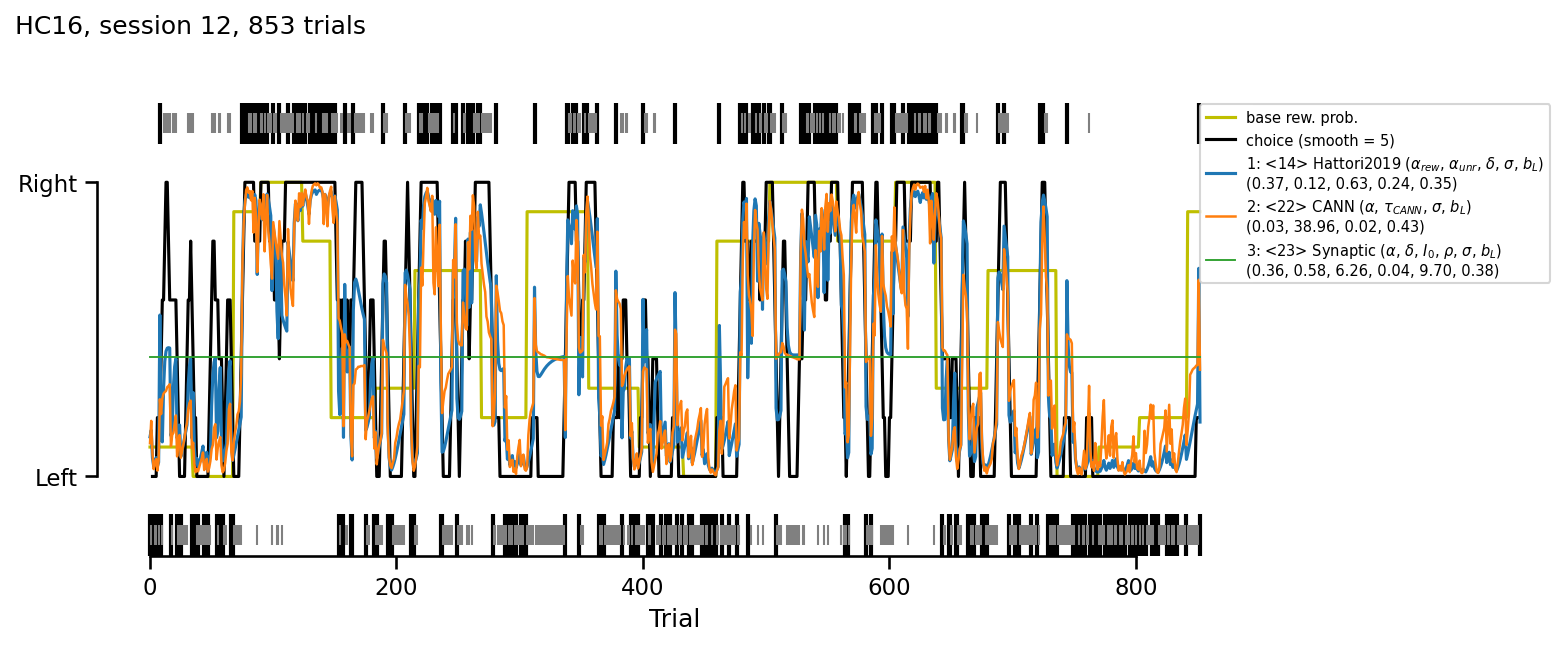

In [149]:
key = (experiment.Session & (foraging_model.FittedSessionModel & 'model_id = 23')).fetch('KEY', limit=1, offset=9)[0]
plot_session_fitted_choice(key, specified_model_ids=[14, 22, 23])

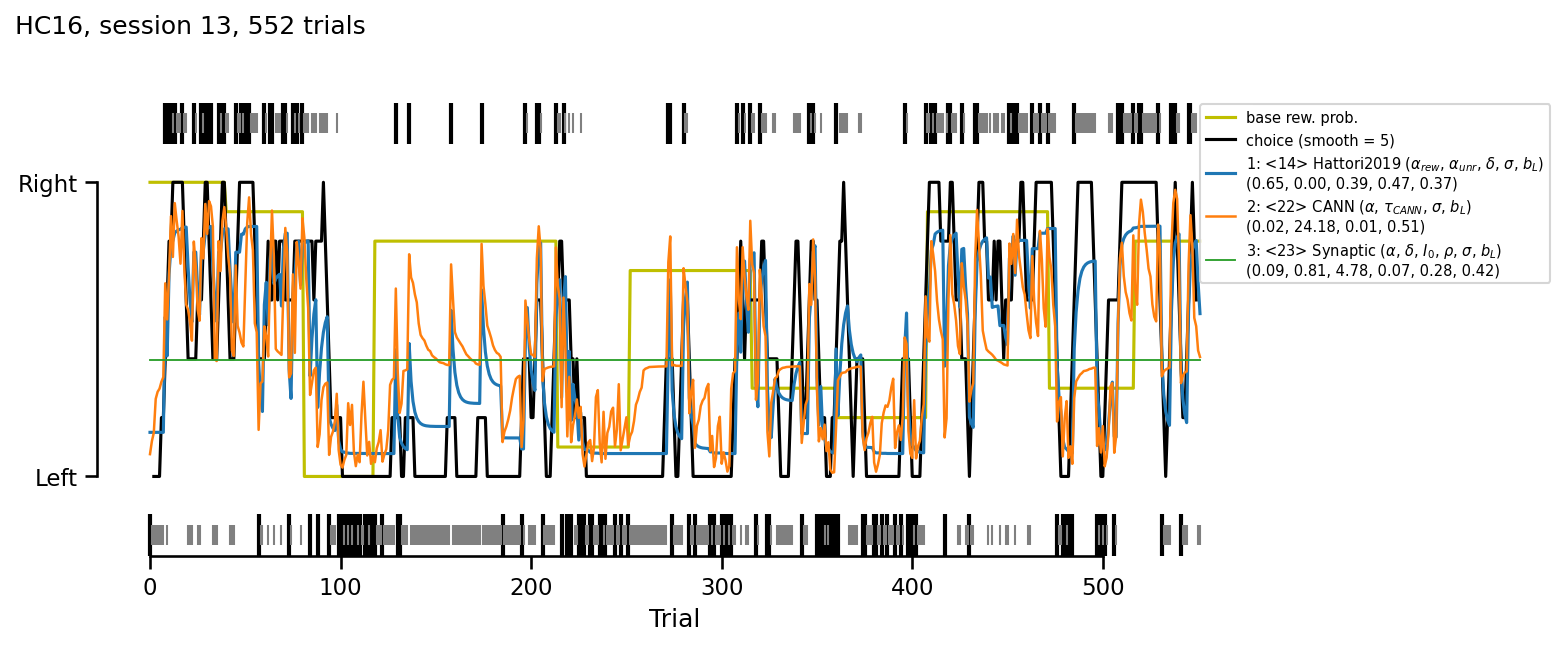

In [152]:
key = (experiment.Session & (foraging_model.FittedSessionModel & 'model_id = 23')).fetch('KEY', limit=1, offset=10)[0]
plot_session_fitted_choice(key, specified_model_ids=[14, 22, 23])